<a href="https://colab.research.google.com/github/efandresena/SemEval/blob/main/EDA_SemEval9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Subtask 1

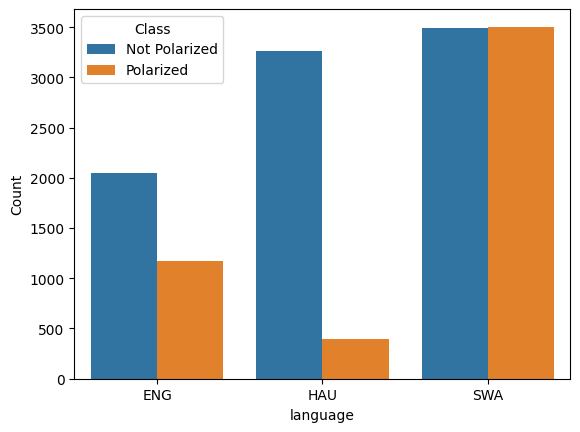

In [ ]:
# Paths and selected languages for Subtask 1
wokdir = '/content/drive/MyDrive/BLOC#4/NLP/SemEval/dev_phase/subtask1/train'
langs = ['eng', 'hau', 'swa']

# Prepare data for plotting
plot_data = []

for lang in langs:
    path = os.path.join(wokdir, f'{lang}.csv')
    if os.path.exists(path):
        df = pd.read_csv(path)
        counts = df['polarization'].value_counts().to_dict()  # 0/1 counts
        plot_data.append({
            'language': lang.upper(),
            'Not Polarized': counts.get(0, 0),
            'Polarized': counts.get(1, 0)
        })

# Convert to long format for seaborn
plot_df = pd.DataFrame(plot_data)
plot_df = plot_df.melt(id_vars='language', var_name='Class', value_name='Count')

# Plot stacked bar chart
sns.barplot(x='language', y='Count', hue='Class', data=plot_df)
plt.savefig('subtask1_class_distribution.pdf')
plt.show()

## Subtask  2 and 3

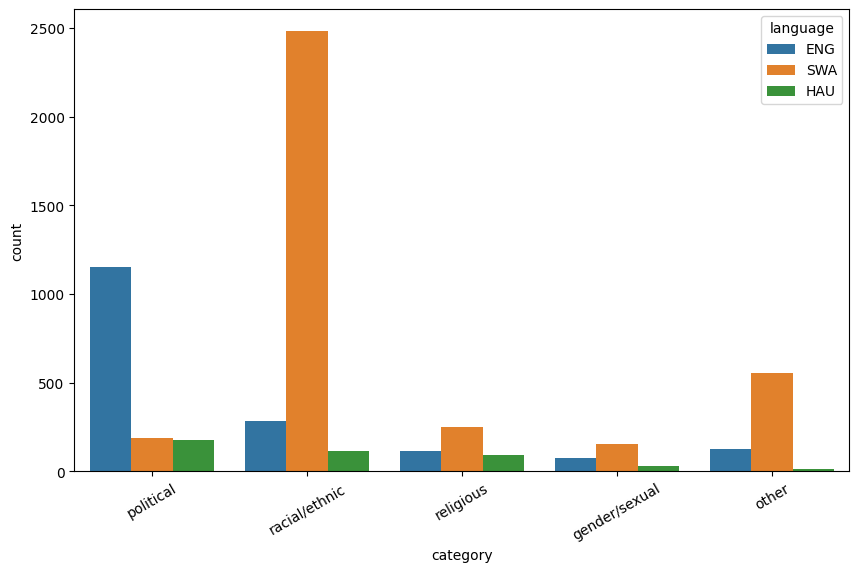

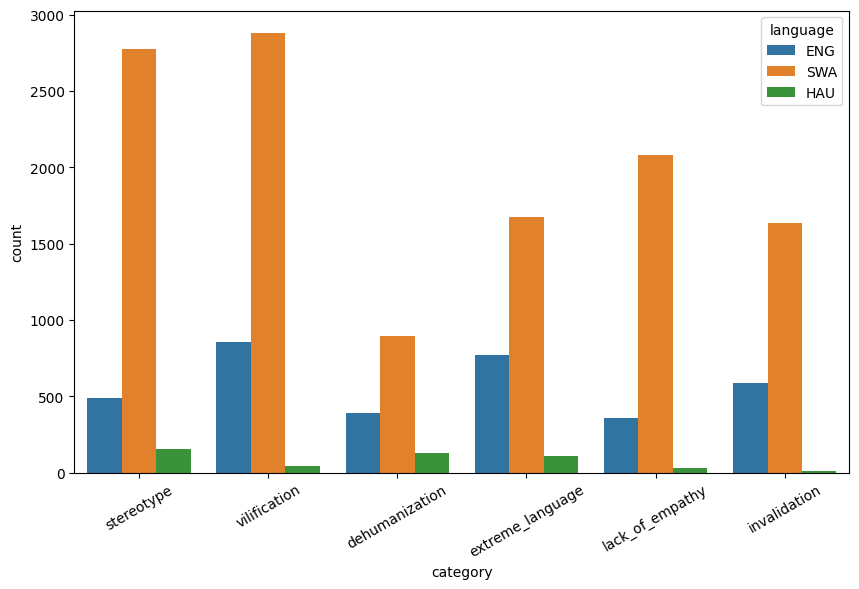

In [ ]:

def plot_subtask_categories(wokdir, langs, categories, title, i):
    # Prepare data
    plot_data = []
    for lang in langs:
        path = os.path.join(wokdir, f'{lang}.csv')
        if os.path.exists(path):
            df = pd.read_csv(path)
            counts = df[categories].apply(pd.Series.value_counts).fillna(0).sum(axis=1)
            for cat in categories:
                plot_data.append({
                    'language': lang.upper(),
                    'category': cat,
                    'count': df[cat].sum() if cat in df.columns else 0
                })

    # Dataframe for plotting
    plot_df = pd.DataFrame(plot_data)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='category', y='count', hue='language', data=plot_df)
    plt.xticks(rotation=30)
    plt.savefig(f"subtask{i}_class_distribution.pdf")
    plt.show()


# Subtask 2
wokdir2 = '/content/drive/MyDrive/BLOC#4/NLP/SemEval/dev_phase/subtask2/train'
langs2 = ['eng', 'swa','hau']
categories2 = ['political','racial/ethnic','religious','gender/sexual','other']
plot_subtask_categories(wokdir2, langs2, categories2, 'Subtask 2: Category Distribution for English and Swahili', i=2)

# Subtask 3
wokdir3 = '/content/drive/MyDrive/BLOC#4/NLP/SemEval/dev_phase/subtask3/train'
langs3 = ['eng', 'swa','hau']
categories3 = ['stereotype','vilification','dehumanization','extreme_language','lack_of_empathy','invalidation']
plot_subtask_categories(wokdir3, langs3, categories3, 'Subtask 3: Category Distribution for English and Swahili', i=3)


# Plot of fastext model

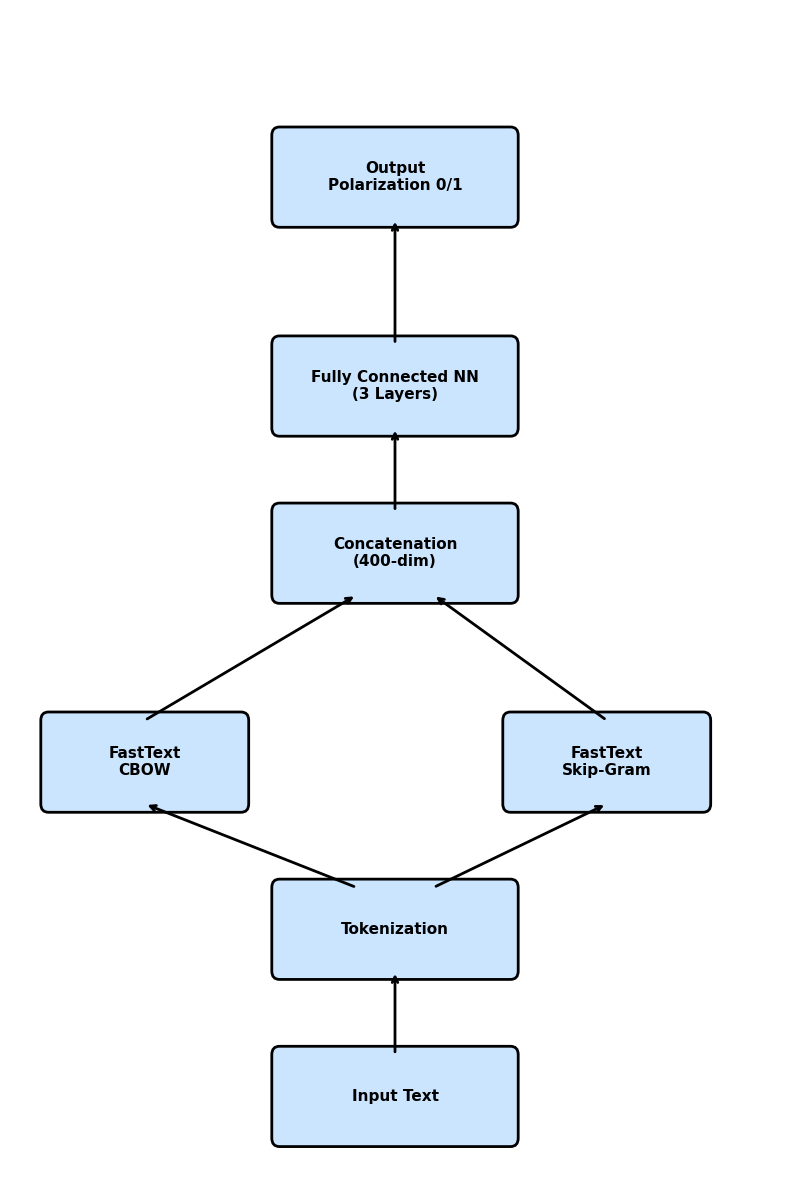

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

fig, ax = plt.subplots(figsize=(8, 12))
ax.axis('off')
ax.set_xlim(0, 10)
ax.set_ylim(0, 14)

# Function to draw boxes with text
def draw_box(x, y, text, width=3, height=1):
    rect = FancyBboxPatch((x, y), width, height,
                          boxstyle="round,pad=0.1",
                          edgecolor="black", facecolor="#cce5ff", linewidth=2)
    ax.add_patch(rect)
    ax.text(x + width/2, y + height/2, text, ha='center', va='center',
            fontsize=11, weight='bold')

# Draw boxes from bottom to top
draw_box(3.5, 0.5, "Input Text")
draw_box(3.5, 2.5, "Tokenization")

# Two parallel embeddings
draw_box(0.5, 4.5, "FastText\nCBOW", width=2.5)
draw_box(6.5, 4.5, "FastText\nSkip-Gram", width=2.5)

draw_box(3.5, 7, "Concatenation\n(400-dim)")
draw_box(3.5, 9, "Fully Connected NN\n(3 Layers)")
draw_box(3.5, 11.5, "Output\nPolarization 0/1")

# Draw arrows
# Input to Tokenization
ax.annotate("", xy=(5, 2.5), xytext=(5, 1.5),
            arrowprops=dict(arrowstyle="->", lw=2))

# Tokenization to both embeddings
ax.annotate("", xy=(1.75, 4.5), xytext=(4.5, 3.5),
            arrowprops=dict(arrowstyle="->", lw=2))
ax.annotate("", xy=(7.75, 4.5), xytext=(5.5, 3.5),
            arrowprops=dict(arrowstyle="->", lw=2))

# Both embeddings to Concatenation
ax.annotate("", xy=(4.5, 7), xytext=(1.75, 5.5),
            arrowprops=dict(arrowstyle="->", lw=2))
ax.annotate("", xy=(5.5, 7), xytext=(7.75, 5.5),
            arrowprops=dict(arrowstyle="->", lw=2))

# Concatenation to NN
ax.annotate("", xy=(5, 9), xytext=(5, 8),
            arrowprops=dict(arrowstyle="->", lw=2))

# NN to Output
ax.annotate("", xy=(5, 11.5), xytext=(5, 10),
            arrowprops=dict(arrowstyle="->", lw=2))

plt.tight_layout()
plt.savefig("images.pdf", dpi=300, bbox_inches='tight')
plt.show()

##Subtask 2 and 3  

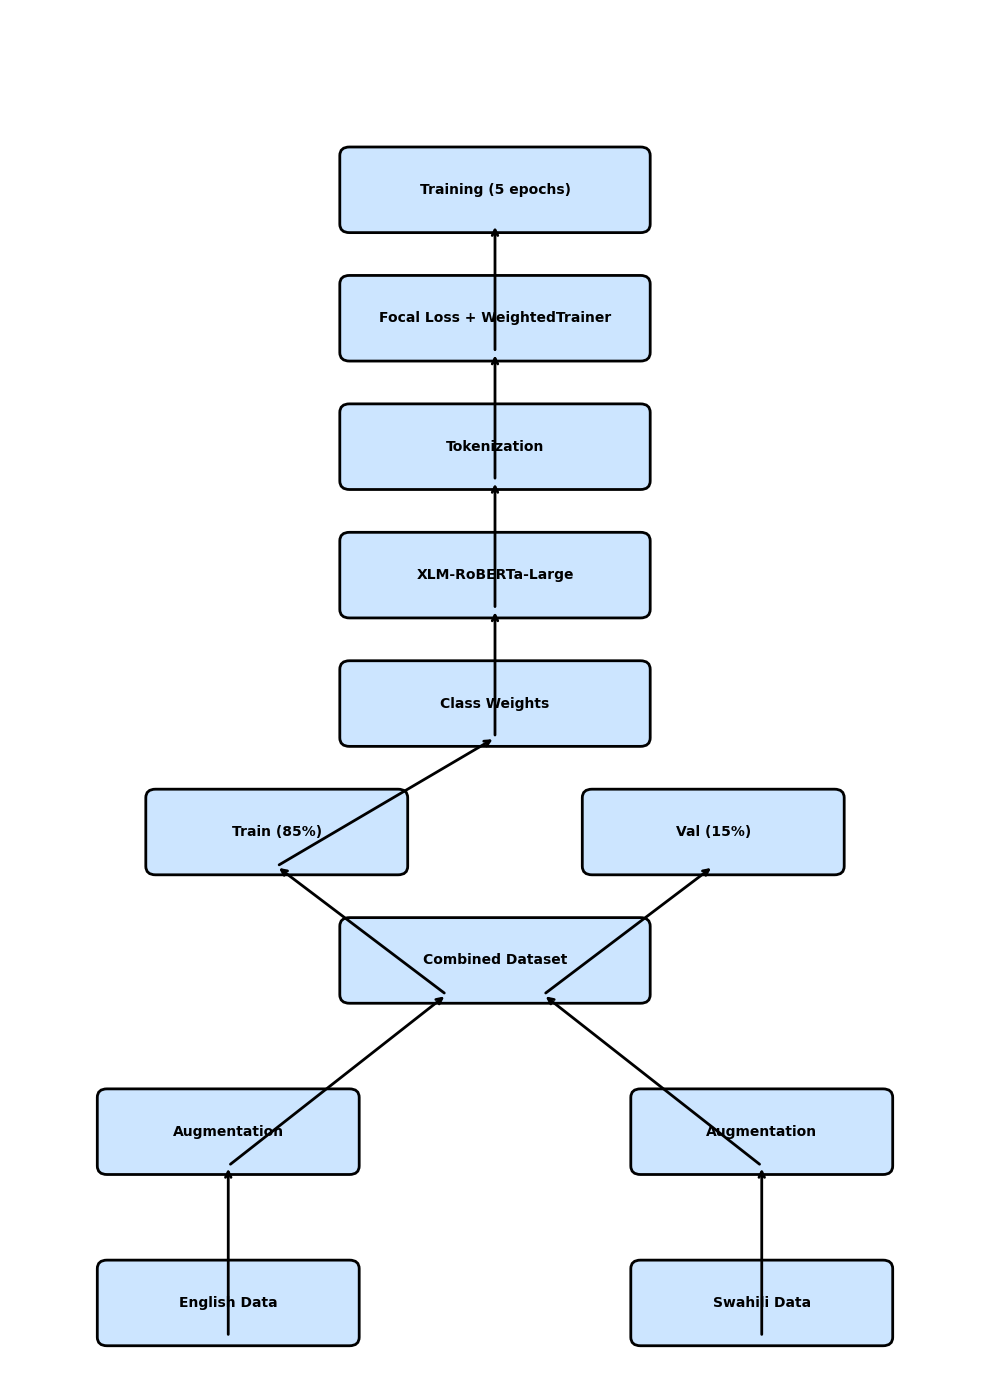

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

fig, ax = plt.subplots(figsize=(10, 14))
ax.axis('off')
ax.set_xlim(0, 10)
ax.set_ylim(0, 16)

def draw_box(x, y, text, width=3, height=0.8):
    rect = FancyBboxPatch((x, y), width, height,
                          boxstyle="round,pad=0.1",
                          edgecolor="black", facecolor="#cce5ff", linewidth=2)
    ax.add_patch(rect)
    ax.text(x + width/2, y + height/2, text, ha='center', va='center',
            fontsize=10, weight='bold')

# Inverted positions (start from bottom)
draw_box(1, 0.5, "English Data", width=2.5)
draw_box(6.5, 0.5, "Swahili Data", width=2.5)

draw_box(1, 2.5, "Augmentation", width=2.5)
draw_box(6.5, 2.5, "Augmentation", width=2.5)

draw_box(3.5, 4.5, "Combined Dataset")

draw_box(1.5, 6, "Train (85%)", width=2.5)
draw_box(6, 6, "Val (15%)", width=2.5)

draw_box(3.5, 7.5, "Class Weights")

draw_box(3.5, 9, "XLM-RoBERTa-Large")

draw_box(3.5, 10.5, "Tokenization")

draw_box(3.5, 12, "Focal Loss + WeightedTrainer")

draw_box(3.5, 13.5, "Training (5 epochs)")

# Arrows (flip start/end)
ax.annotate("", xy=(2.25, 2.5), xytext=(2.25, 0.5), arrowprops=dict(arrowstyle="->", lw=2))
ax.annotate("", xy=(7.75, 2.5), xytext=(7.75, 0.5), arrowprops=dict(arrowstyle="->", lw=2))

ax.annotate("", xy=(4.5, 4.5), xytext=(2.25, 2.5), arrowprops=dict(arrowstyle="->", lw=2))
ax.annotate("", xy=(5.5, 4.5), xytext=(7.75, 2.5), arrowprops=dict(arrowstyle="->", lw=2))

ax.annotate("", xy=(2.75, 6), xytext=(4.5, 4.5), arrowprops=dict(arrowstyle="->", lw=2))
ax.annotate("", xy=(7.25, 6), xytext=(5.5, 4.5), arrowprops=dict(arrowstyle="->", lw=2))

ax.annotate("", xy=(5, 7.5), xytext=(2.75, 6), arrowprops=dict(arrowstyle="->", lw=2))
ax.annotate("", xy=(5, 9), xytext=(5, 7.5), arrowprops=dict(arrowstyle="->", lw=2))
ax.annotate("", xy=(5, 10.5), xytext=(5, 9), arrowprops=dict(arrowstyle="->", lw=2))
ax.annotate("", xy=(5, 12), xytext=(5, 10.5), arrowprops=dict(arrowstyle="->", lw=2))
ax.annotate("", xy=(5, 13.5), xytext=(5, 12), arrowprops=dict(arrowstyle="->", lw=2))

plt.tight_layout()
plt.savefig("training_pipeline_upside_down.pdf", dpi=300, bbox_inches='tight')
plt.show()
